<img src="images/construct_bannr.jpg" >

<img src="images/openclass_197_banner.jpg" >

---

<div class="bg-primary text-center">
    - Summary -
</div>


**3D Object Detection and Navigation** is a crucial skill in robotics and computer vision applications. It enables robots to **perceive and interact with their environment**, making it essential for tasks such as autonomous navigation, object manipulation, and environmental mapping. This technology has wide-ranging applications in fields like warehouse automation, search and rescue operations, and assistive robotics.

In the upcoming Open Class, you'll how to implement 3D object detection using **Darknet** and **YOLO** and apply it to navigate the LIMO robot toward detected objects.

What you'll learn:
- Introduction to 3D Object Detection in Robotics
- Understanding Darknet and YOLO architecture and its application in 3D space
- Integrating Darknet and YOLO with ROS 2 for real-time object detection
- Implementing navigation algorithms to move the LIMO robot toward detected objects
- Hands-on experience in building a complete perception-action pipeline

Robot Used: **LIMO Robot**

<div class="bg-primary text-center">
    - Summary -
</div>

<div>
    <h1 class="text-center">
        <span class="text-primary">Introduction</span>
        &nbsp;
        <span class="">What is 3D Object Detection in Robotics ? <br>
        
<img src="images/car_3d_detect.jpg"  /></span>

    
</div>

3D **object detection** is a critical task in robotics, enabling robots to **perceive, understand, and interact with their environment** in a more advanced and autonomous manner. Unlike traditional 2D object detection, which identifies objects in images or video frames, 3D object detection involves **recognizing and localizing objects in three-dimensional space**. This process provides richer spatial information such as depth, orientation, and position, which is crucial for tasks like navigation, manipulation, and interaction in real-world environments.


## Why 3D Object Detection is Important in Robotics


Robots, especially those operating in dynamic environments, need to detect objects not just on a flat plane but in three-dimensional space to avoid collisions, manipulate objects, and interact with the world. 3D object detection enhances:



- **Autonomous driving**: Self-driving cars use 3D object detection to recognize vehicles, pedestrians, and obstacles, determining their exact location and speed.

<img src="images/tesla_aug_vision.jpg">

This example Tesla's `Augmented Vision` debug. 

- **Robotic grasping**: In industrial robotics, 3D detection helps robots accurately locate objects for pick-and-place tasks, handling various objects regardless of their orientation.


<img src="https://www.frontiersin.org/files/Articles/1038658/frobt-10-1038658-HTML/image_m/frobt-10-1038658-g002.jpg" >

- **Drone navigation**: UAVs (unmanned aerial vehicles) rely on 3D object detection to avoid obstacles, map terrain, and navigate safely.

<img src="https://www.researchgate.net/publication/228941748/figure/fig5/AS:300872178388993@1448744925185/a-Dense-maximum-likelihood-occupancy-voxel-map-of-the-environment-depicted-in-Fig-5a.png" />

## How 3D Object Detection Works


3D object detection involves several key components:



1. **Sensors**: These provide the raw data, usually in the form of point clouds or depth maps. Commonly used sensors include:

    - LiDAR (Light Detection and Ranging): Emits laser beams to measure distances and build detailed 3D point clouds.
    - Stereo cameras: Capture two images from slightly different viewpoints, allowing depth calculation through triangulation.
    - Depth cameras: Like Microsoft Kinect or Intel RealSense, they provide a depth map alongside standard RGB data.
    - Point Clouds and 3D Data Representation: Point clouds are the most common representation for 3D object detection. A point cloud consists of many data points in a 3D coordinate system, where each point represents a specific location in space. Other representations include voxels (3D pixels) or meshes.
    
    **We will be using the depth camera included with the LIMO robot.**
    
    

2. **Algorithms**: Once the 3D data is acquired, algorithms are used to identify and classify objects. Common approaches include:

    - Convolutional Neural Networks (CNNs): Deep learning models that can be adapted for 3D data. These models take advantage of the spatial structure of objects and classify them in 3D.
    - Region Proposal Networks (RPNs): Used to generate potential regions in the point cloud that might contain objects, followed by classification and refinement.
    
    **We will be using YOLOv7 to perform the object detection.**
    

3. **Bounding Boxes**: Detected objects are usually represented with 3D bounding boxes that provide information about the object's position, size, and orientation in the environment.


<div>
    <h1 class="text-center">
        <span class="text-primary">YOLO</span>
        &nbsp;
        <span class="">Understanding YOLO architecture and its application in 3D space <br>
        
<img src="https://user-images.githubusercontent.com/26833433/212094133-6bb8c21c-3d47-41df-a512-81c5931054ae.png"  /></span>

    
</div>

YOLO, or *You Only Look Once*, is a real-time object detection algorithm known for its high-speed performance and accuracy. Unlike traditional object detection methods that apply sliding windows or region proposals over the entire image (e.g., R-CNN), YOLO reframes the problem as a single regression problem. It predicts bounding boxes and class probabilities directly from full images in a single pass through the network, hence the name.

YOLO's architecture consists of:

1.  **Input**: The model takes an image and divides it into an S×SS \times SS×S grid. Each grid cell is responsible for predicting a certain number of bounding boxes and class probabilities for objects whose centers fall inside the cell.

2.  **Bounding Boxes**: Each bounding box is represented by 5 predictions: (x,y,w,h,c)(x, y, w, h, c)(x,y,w,h,c), where:

    -   x and y are the coordinates of the center of the box.
    -   w and h are the width and height of the box.
    -   c is the confidence score that reflects how likely it is that the box contains an object.
3.  **Class Probabilities**: For each grid cell, YOLO predicts the probability distribution over all the object classes. These probabilities are conditioned on the box containing an object.

4.  **Backbone Network**: YOLO uses a convolutional neural network (CNN) as a feature extractor (such as Darknet). Early versions of YOLO used a simpler CNN, while more advanced versions like YOLOv3 and YOLOv5 use deeper networks, such as ResNet or CSPDarknet53, for improved accuracy and feature extraction.

5.  **Loss Function**: The loss function used in YOLO combines several components, including:

    -   Localization loss: Penalizes errors in bounding box coordinates.
    -   Confidence loss: Penalizes incorrect object/no-object classification.
    -   Classification loss: Penalizes incorrect predictions of class labels.
        
        
#### Applications of YOLO in 3D Object Detection:

-   **Autonomous Vehicles**: Detecting pedestrians, vehicles, cyclists, and other objects in 3D space, crucial for safe navigation.
-   **Robotics**: Detecting and understanding the 3D positions of objects in the environment for tasks like manipulation or interaction.
-   **Augmented Reality (AR)**: Integrating virtual objects with real-world 3D scenes by understanding object positions and dimensions.

<div>
    <h1 class="text-center">
        <span class="text-primary">Start Simulation</span>        
    
</div>

The provided gazebo Limo simulation will help you throughout the lesson. 

Use it to test your algorithm.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal #1
</span>

In [ ]:
ros2 launch limo_description limo_basic.launch.xml

<img src="images/open_sim.png" />

<img src="images/sim.png" />

## <span style="color:blue;">Get one LIMO PRO Robot and practice ROS 2!</span>

<table border="1">
    <tr>
        <td><h1>Limo PRO includes:</h1><br>
            <ul><h1>Lidar</h1></ul>
            <ul><h1>IMU</h1></ul>
            <ul><h1>RGB-D camera ORBEC Dabai</h1></ul>
            <ul><h1>Nvidia Jetson Orin nano</h1></ul>
            <ul><h1>7'' display</h1></ul>
        </td>
        <td><img src="images/limo_gif.gif" width="300"></td>
    </tr>
</table>

## <span style="color:blue;">Get yours here: https://app.theconstruct.ai/product/agile-x-limo-pro-robot-for-education-and-research</span>

<div>
    <h1 class="text-center">
        <span class="text-primary">Debug View</span>
        &nbsp;
        <span class="">What are we working with ? <br>
        
    
</div>

If you have already opened your workspace you will see that some of the important packages like [darknet](https://github.com/AlexeyAB/darknet) and [darknet_ros](https://github.com/ros2/openrobotics_darknet_ros?tab=readme-ov-file) are already setup for you. 

If you would like to set it up on on your own rosject feel free to follow the documentation on [https://github.com/ros2/openrobotics_darknet_ros](https://github.com/ros2/openrobotics_darknet_ros?tab=readme-ov-file) but for the purposes of this openclass everything is provided for you, no installs necessary. 

Since we have briefly gone into what YOLO family of models does let’s hit the ground running and launch it.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal #2
</span>

In [ ]:
cd ~/ros2_ws
ros2 launch openrobotics_darknet_ros detector_launch.py rgb_image:=/camera/image_raw

And …. nothing ? 

Not exactly, this package doesn’t launch with a debug view out of the box which is why we will be creating our own. 

However if you do a ros2 topic list you can see that it is publishing on a topics.

So lets create our own debug view. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal #3
</span>

In [ ]:
cd ~/ros2_ws/src
ros2 pkg create --build-type ament_python 3d_object_detection --dependencies rclpy sensor_msgs vision_msgs cv_bridge tf2_ros

Then we will need to edit a few files. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    setup.py
</span>

In [ ]:
from setuptools import find_packages, setup

package_name = '3d_object_detection'

setup(
    name=package_name,
    version='0.0.0',
    packages=find_packages(exclude=['test']),
    data_files=[
        ('share/ament_index/resource_index/packages',
            ['resource/' + package_name]),
        ('share/' + package_name, ['package.xml']),
    ],
    install_requires=['setuptools'],
    zip_safe=True,
    maintainer='user',
    maintainer_email='user@todo.todo',
    description='TODO: Package description',
    license='TODO: License declaration',
    tests_require=['pytest'],
    entry_points={
        'console_scripts': [
            '3d_object_detection_node = 3d_object_detection.3d_object_detection_node:main'
        ],
    },
)


Then you have to create the main python script. 

<img src="images/create_pkg.png" />

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    3d_object_detection_node.py
</span>

In [ ]:
import rclpy
from rclpy.node import Node
from sensor_msgs.msg import Image
from vision_msgs.msg import Detection2DArray
from cv_bridge import CvBridge, CvBridgeError
import cv2
import numpy as np

class ObjectDetectionOverlay(Node):
    def __init__(self):
        super().__init__('object_detection_overlay')

        # Subscribe to the camera image and detection topics
        self.image_sub = self.create_subscription(
            Image, '/camera/depth/image_raw', self.image_callback, 10)
        self.detections_sub = self.create_subscription(
            Detection2DArray, '/detector_node/detections', self.detection_callback, 10)

        # Initialize other variables
        self.bridge = CvBridge()
        self.detections = None
        self.image = None

    def image_callback(self, msg):
        try:
            # Convert the depth image to a grayscale 8-bit image for visualization
            depth_image = self.bridge.imgmsg_to_cv2(msg, desired_encoding='32FC1')
            # Normalize the depth image to range 0-255 for visualization
            normalized_depth_image = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX)
            # Convert to 8-bit grayscale
            self.image = np.uint8(normalized_depth_image)

            # Convert grayscale to color to allow color drawings (bounding boxes)
            self.image = cv2.cvtColor(self.image, cv2.COLOR_GRAY2BGR)

            # Process and display the image with detections overlayed
            if self.detections is not None:
                self.overlay_detections()
        except CvBridgeError as e:
            self.get_logger().error(f"Error converting image: {str(e)}")

    def detection_callback(self, msg):
        # Store the latest detections
        self.detections = msg

    def overlay_detections(self):
        if self.image is None:
            return

        # Create a copy of the image to draw on
        overlay_image = self.image.copy()

        for detection in self.detections.detections:
            bbox = detection.bbox
            results = detection.results[0]  # Assuming only one result per detection

            # Calculate the bounding box in pixel coordinates
            x_min = int(bbox.center.position.x - (bbox.size_x / 2))
            y_min = int(bbox.center.position.y - (bbox.size_y / 2))
            x_max = int(bbox.center.position.x + (bbox.size_x / 2))
            y_max = int(bbox.center.position.y + (bbox.size_y / 2))

            # Draw the bounding box
            cv2.rectangle(overlay_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Overlay the detected object's name and confidence level
            object_name = results.hypothesis.class_id
            confidence = results.hypothesis.score * 100  # Confidence in percentage
            label = f"{object_name}: {confidence:.2f}%"

            # Put the label above the bounding box
            cv2.putText(overlay_image, label, (x_min, y_min - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Show the image with OpenCV
        cv2.imshow("Detections Overlay", overlay_image)
        cv2.waitKey(1)

def main(args=None):
    rclpy.init(args=args)
    node = ObjectDetectionOverlay()
    rclpy.spin(node)
    node.destroy_node()
    rclpy.shutdown()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()

Now you can build and run your new package. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal #3
</span>

In [ ]:
cd ~/ros2_ws
colcon build --packages-select 3d_object_detection

In [ ]:
source install/setup.bash
ros2 run 3d_object_detection 3d_object_detection_node

You might have to drive a little to the objects. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal
</span>

In [ ]:
ros2 run teleop_twist_keyboard teleop_twist_keyboard

Then when you are infront of the objects you should get. 

<img src="images/stage_one.png"/>

So far we've done:

- **Image Processing**: The depth image is converted and prepared for visualization (grayscale to color).
- **Detection Handling**: The detection_callback stores new detections as they arrive.
- **Detection Overlay**: The stored detections are drawn onto the image in the form of bounding boxes and labels, and the final image with the overlay is displayed in real-time.

<details>
    <summary><b>Click for Detailed breakdown</b> 👇 </summary>
<br>
    
### 1\. **Image Callback** (`image_callback`)

-   This callback is triggered whenever a new image is received from the camera. The goal here is to process the image for visualization and overlay detections.

-   **Image Conversion**: It uses `CvBridge` to convert the ROS image message (`sensor_msgs/Image`) into an OpenCV image. In this case, it's converting a depth image (32-bit float) into a format that can be visualized by normalizing it and converting it to an 8-bit grayscale image.

-   **Image Preparation**: The grayscale image is converted to a color (BGR) format, allowing further operations such as drawing colored bounding boxes on the image.

-   **Overlay Detections**: If object detections are available (i.e., received through the other callback), it calls the `overlay_detections` method, which adds the detected objects' bounding boxes and labels to the image.

### 2\. **Detection Callback** (`detection_callback`)

-   This callback is triggered whenever new detection data is received from the object detection topic.

-   **Store Detections**: The detection data (`Detection2DArray`) is stored in the `self.detections` variable. This detection data contains bounding boxes, object class labels, and confidence scores.

-   This detection data is used later in the `overlay_detections` method to draw the detected objects onto the image.

### 3\. **Overlaying Detections** (`overlay_detections`)

-   This method processes the stored detection data and overlays it on the image.

-   **Bounding Box Calculation**: For each detection, the 2D bounding box coordinates are calculated using the detection's center position (`bbox.center.position.x`, `bbox.center.position.y`) and size (`bbox.size_x`, `bbox.size_y`). The top-left and bottom-right corners of the bounding box are derived from this.

-   **Drawing Bounding Boxes**: A green bounding box is drawn on the image around each detected object using OpenCV's `rectangle` function.

-   **Label and Confidence**: The detected object's class name (`class_id`) and confidence score (`hypothesis.score`) are also extracted. This information is overlaid above the bounding box in text form, showing the object's label and how confident the model is about the detection.

-   **Display Image**: After overlaying the bounding boxes and labels, the updated image is displayed using OpenCV's `imshow` function. This visualizes the detected objects in the camera's view.
</details>

<div>
    <h1 class="text-center">
        <span class="text-primary">What is that ?</span>
        &nbsp;
        <span class="">Dealing with model confidence <br>
    
</div>

We can see now the model is really outputting predictions. 

But what’s this ? aeroplane ??? 

See if you look at the confidence next to it you can see that the random detection has a confidence of 71.75 percent while the person which we know actually exists has 85.91, so lets filter out our detections and make sure only detections with at least 80% confidence gets considered.

In [ ]:
def detection_callback(self, msg):
    # Filter detections based on confidence
    filtered_detections = []
    for detection in msg.detections:
        # Assuming the first result contains the hypothesis with the highest confidence
        if detection.results[0].hypothesis.score >= 0.80:  # 80% confidence threshold
            filtered_detections.append(detection)

    # Store the filtered detections
    self.detections = Detection2DArray(detections=filtered_detections)

Now we need to rebuild our package using the previous command and rerun. 

<img src="images/stage_2.png" />

<div>
    <h1 class="text-center">
        <span class="text-primary">So, where exactly is it ?</span>
        &nbsp;
        <span class="">Extrapolating 3D Position <br>
    
</div>

Now this is great and all but isn’t this class about 3d object detection ? 

Yep ! 

And thats why we overlayed out detections on the depth image and not the color, because now we will be using the depth image to get the 3d position of the object. 

Here are the steps we are going to follow. 

### Steps:

1. **Calculate the centroid of the bounding box** from the detection.
2. **Get the depth value** from the depth image at the centroid.
3. **Convert 2D image coordinates (u, v) and depth (z)** into 3D space using the camera's intrinsic parameters (from the `/camera/depth/camera_info` topic).
4. Display the 3D coordinates in the OpenCV window.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    3d_object_detection_node.py
</span>

In [ ]:
import rclpy
from rclpy.node import Node
from sensor_msgs.msg import Image, CameraInfo
from vision_msgs.msg import Detection2DArray
from cv_bridge import CvBridge, CvBridgeError
import cv2
import numpy as np

class ObjectDetectionOverlay(Node):
    def __init__(self):
        super().__init__('object_detection_overlay')

        # Subscribe to the camera image, camera info, and detection topics
        self.image_sub = self.create_subscription(
            Image, '/camera/depth/image_raw', self.image_callback, 10)
        self.camera_info_sub = self.create_subscription(
            CameraInfo, '/camera/depth/camera_info', self.camera_info_callback, 10)
        self.detections_sub = self.create_subscription(
            Detection2DArray, '/detector_node/detections', self.detection_callback, 10)

        # Initialize other variables
        self.bridge = CvBridge()
        self.detections = None
        self.image = None
        self.depth_image = None  # Original depth image for 3D calculations
        self.camera_info = None  # Camera intrinsic parameters

    def camera_info_callback(self, msg):
        # Store the camera info for intrinsic parameters
        self.camera_info = msg

    def image_callback(self, msg):
        try:
            # Convert the depth image to a float32 format
            depth_image = self.bridge.imgmsg_to_cv2(msg, desired_encoding='32FC1')
            
            # Normalize the depth image to range 0-255 for visualization (optional)
            normalized_depth_image = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX)
            
            # Convert normalized depth image to 8-bit grayscale for displaying
            display_image = np.uint8(normalized_depth_image)

            # Convert grayscale to color to allow color drawings (bounding boxes)
            display_image = cv2.cvtColor(display_image, cv2.COLOR_GRAY2BGR)

            # Store the images
            self.depth_image = depth_image  # Original depth image for 3D calculations
            self.image = display_image  # Image for visualization

            # Process and display the image with detections overlayed
            if self.detections is not None:
                self.overlay_detections()

        except CvBridgeError as e:
            self.get_logger().error(f"Error converting image: {str(e)}")

    def detection_callback(self, msg):
        # Filter detections based on confidence
        filtered_detections = []
        for detection in msg.detections:
            # Assuming the first result contains the hypothesis with the highest confidence
            if detection.results[0].hypothesis.score >= 0.80:  # 80% confidence threshold
                filtered_detections.append(detection)

        # Store the filtered detections
        self.detections = Detection2DArray(detections=filtered_detections)

    def overlay_detections(self):
        if self.image is None or self.camera_info is None or self.depth_image is None:
            return

        # Get the intrinsic parameters from camera_info
        fx = self.camera_info.k[0]  # Focal length in x
        fy = self.camera_info.k[4]  # Focal length in y
        cx = self.camera_info.k[2]  # Optical center in x
        cy = self.camera_info.k[5]  # Optical center in y

        # Create a copy of the image to draw on
        overlay_image = self.image.copy()

        for detection in self.detections.detections:
            bbox = detection.bbox
            results = detection.results[0]  # Assuming only one result per detection

            # Calculate the bounding box in pixel coordinates
            x_min = int(bbox.center.position.x - (bbox.size_x / 2))
            y_min = int(bbox.center.position.y - (bbox.size_y / 2))
            x_max = int(bbox.center.position.x + (bbox.size_x / 2))
            y_max = int(bbox.center.position.y + (bbox.size_y / 2))

            # Draw the bounding box
            cv2.rectangle(overlay_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Calculate the centroid of the bounding box
            centroid_x = int(bbox.center.position.x)
            centroid_y = int(bbox.center.position.y)

            # Draw the centroid
            cv2.circle(overlay_image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)

            # Get the depth at the centroid from the original depth image
            depth_value = self.depth_image[centroid_y, centroid_x]  # Use depth_image, not display_image

            # If depth is valid (not NaN or infinity)
            if np.isscalar(depth_value) and not np.isnan(depth_value) and not np.isinf(depth_value):
                # Calculate the 3D position in the camera_depth_optical_frame
                z = depth_value
                x = (centroid_x - cx) * z / fx
                y = (centroid_y - cy) * z / fy

                # Overlay the 3D position on the image
                label_3d = f"X: {x:.2f}, Y: {y:.2f}, Z: {z:.2f} m"
                cv2.putText(overlay_image, label_3d, (x_min, y_max + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

            # Overlay the detected object's name and confidence level
            object_name = results.hypothesis.class_id
            confidence = results.hypothesis.score * 100  # Confidence in percentage
            label = f"{object_name}: {confidence:.2f}%"

            # Put the label above the bounding box
            cv2.putText(overlay_image, label, (x_min, y_min - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Show the image with OpenCV
        cv2.imshow("Detections Overlay", overlay_image)
        cv2.waitKey(1)

def main(args=None):
    rclpy.init(args=args)
    node = ObjectDetectionOverlay()
    rclpy.spin(node)
    node.destroy_node()
    rclpy.shutdown()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()


Now you can rebuild and rerun. 

<img src="images/stage_3.png"/>

In this section we:
    
-   **Camera Info Subscription**: The node now listens to the camera info topic to retrieve intrinsic parameters for calculating 3D positions.
-   **Depth Image Storage**: The raw depth image is stored separately for accurate 3D calculations.
-   **Confidence Filtering**: Detections are filtered based on a confidence threshold (80%) to only visualize reliable detections.
-   **3D Position Calculation**: For each detected object, the 3D position in camera space is calculated using depth data and camera intrinsics.
-   **3D Position Overlay**: The 3D position is displayed on the image, giving real-world coordinates (X, Y, Z) for each detected object.
-   **Centroid Marking**: A red circle is drawn at the centroid of each bounding box, which is used for depth retrieval and 3D calculations.

<details>
    <summary><b>Click for Detailed breakdown</b> 👇 </summary>
<br>

### 1\. **Camera Info Subscription (`camera_info_callback`)**

-   The code now subscribes to the `/camera/depth/camera_info` topic, which provides camera intrinsic parameters (like focal lengths and optical center). This information is critical for calculating 3D positions from 2D pixel coordinates and depth values.
-   **Intrinsic Parameters**: The `camera_info_callback` stores the intrinsic parameters of the camera in `self.camera_info`. These values are later used to convert 2D bounding box coordinates into 3D positions using depth information.

### 2\. **Depth Image Storage**

-   The raw depth image is now stored separately in `self.depth_image`, which is essential for calculating 3D object positions. The `image_callback` still processes the image for visualization (converting it to grayscale, normalizing, and displaying), but the original depth data is preserved for use in 3D calculations.

### 3\. **Detection Filtering in `detection_callback`**

-   **Filtering Detections by Confidence**: The code now filters detections based on a confidence threshold. Only detections with a confidence score of 80% or higher are stored and used for overlay.
-   This step ensures that only reliable detections are visualized and processed, which helps reduce noise from low-confidence predictions.

### 4\. **3D Position Calculation and Overlay**

-   **3D Position Calculation**: The main addition is the calculation of the 3D position of each detected object. For each bounding box, the centroid is found, and the depth value at the centroid is retrieved from the original depth image (`self.depth_image`).

    -   The retrieved depth value represents the distance from the camera to the object in meters.
    -   Using the intrinsic parameters from `self.camera_info` (focal lengths and optical center), the code calculates the 3D coordinates (x,y,z)(x, y, z)(x,y,z) of the object in the camera frame using the following formulas:
        -   zzz is the depth value at the centroid.
        -   x=(u-cx)×z/fxx = (u - cx) \times z / fxx=(u-cx)×z/fx, where uuu is the x-coordinate of the centroid.
        -   y=(v-cy)×z/fyy = (v - cy) \times z / fyy=(v-cy)×z/fy, where vvv is the y-coordinate of the centroid.
    -   These 3D coordinates represent the object's position in the camera's optical frame (in meters).
-   **3D Position Display**: The 3D coordinates are overlayed on the image in the form of a text label below the bounding box. This label shows the object's position relative to the camera in terms of X, Y, and Z coordinates (in meters), giving spatial awareness.

### 5\. **Centroid Overlay**

-   A red circle is drawn at the centroid of each detected bounding box, helping to visually mark the center of the object in the image. The centroid is also used to retrieve the depth value for 3D calculations.

</details>

<div>
    <h1 class="text-center">
        <span class="text-primary">Rossification</span>
        &nbsp;
        <span class="">Publishing a TF <br>
    
</div>

Now while this is great for us, its not really useful for doing anything within the robot because this data that we are extrapolating is only within this openCV window. 

Therefore lets publish this data.

Now its possible to create a new topics and stream the data that way but a much better way is to publish this position as a transform to the camera frame (TF). This means we can then later use it for navigation among other means.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    3d_object_detection_node.py
</span>

In [ ]:
import rclpy
from rclpy.node import Node
from sensor_msgs.msg import Image, CameraInfo
from vision_msgs.msg import Detection2DArray
from cv_bridge import CvBridge, CvBridgeError
import cv2
import numpy as np
import tf2_ros
import geometry_msgs.msg

class ObjectDetectionOverlay(Node):
    def __init__(self):
        super().__init__('object_detection_overlay')

        # Subscribe to the camera image, camera info, and detection topics
        self.image_sub = self.create_subscription(
            Image, '/camera/depth/image_raw', self.image_callback, 10)
        self.camera_info_sub = self.create_subscription(
            CameraInfo, '/camera/depth/camera_info', self.camera_info_callback, 10)
        self.detections_sub = self.create_subscription(
            Detection2DArray, '/detector_node/detections', self.detection_callback, 10)

        # Initialize TF broadcaster
        self.tf_broadcaster = tf2_ros.TransformBroadcaster(self)

        # Initialize other variables
        self.bridge = CvBridge()
        self.detections = None
        self.image = None
        self.depth_image = None  # Original depth image for 3D calculations
        self.camera_info = None  # Camera intrinsic parameters

    def camera_info_callback(self, msg):
        # Store the camera info for intrinsic parameters
        self.camera_info = msg

    def image_callback(self, msg):
        try:
            # Convert the depth image to a float32 format
            depth_image = self.bridge.imgmsg_to_cv2(msg, desired_encoding='32FC1')
            
            # Normalize the depth image to range 0-255 for visualization (optional)
            normalized_depth_image = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX)
            
            # Convert normalized depth image to 8-bit grayscale for displaying
            display_image = np.uint8(normalized_depth_image)

            # Convert grayscale to color to allow color drawings (bounding boxes)
            display_image = cv2.cvtColor(display_image, cv2.COLOR_GRAY2BGR)

            # Store the images
            self.depth_image = depth_image  # Original depth image for 3D calculations
            self.image = display_image  # Image for visualization

            # Process and display the image with detections overlayed
            if self.detections is not None:
                self.overlay_detections()

        except CvBridgeError as e:
            self.get_logger().error(f"Error converting image: {str(e)}")

    def detection_callback(self, msg):
        # Filter detections based on confidence
        filtered_detections = []
        for detection in msg.detections:
            # Assuming the first result contains the hypothesis with the highest confidence
            if detection.results[0].hypothesis.score >= 0.80:  # 80% confidence threshold
                filtered_detections.append(detection)

        # Store the filtered detections
        self.detections = Detection2DArray(detections=filtered_detections)

    def overlay_detections(self):
        if self.image is None or self.camera_info is None or self.depth_image is None:
            return

        # Get the intrinsic parameters from camera_info
        fx = self.camera_info.k[0]  # Focal length in x
        fy = self.camera_info.k[4]  # Focal length in y
        cx = self.camera_info.k[2]  # Optical center in x
        cy = self.camera_info.k[5]  # Optical center in y

        # Create a copy of the image to draw on
        overlay_image = self.image.copy()

        for detection in self.detections.detections:
            bbox = detection.bbox
            results = detection.results[0]  # Assuming only one result per detection

            # Calculate the bounding box in pixel coordinates
            x_min = int(bbox.center.position.x - (bbox.size_x / 2))
            y_min = int(bbox.center.position.y - (bbox.size_y / 2))
            x_max = int(bbox.center.position.x + (bbox.size_x / 2))
            y_max = int(bbox.center.position.y + (bbox.size_y / 2))

            # Draw the bounding box
            cv2.rectangle(overlay_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Calculate the centroid of the bounding box
            centroid_x = int(bbox.center.position.x)
            centroid_y = int(bbox.center.position.y)

            # Draw the centroid
            cv2.circle(overlay_image, (centroid_x, centroid_y), 5, (0, 0, 255), -1)

            # Get the depth at the centroid from the original depth image
            depth_value = self.depth_image[centroid_y, centroid_x]  # Use depth_image, not display_image

            # If depth is valid (not NaN or infinity)
            if np.isscalar(depth_value) and not np.isnan(depth_value) and not np.isinf(depth_value):
                # Calculate the 3D position in the camera_depth_optical_frame
                z = depth_value
                x = (centroid_x - cx) * z / fx
                y = (centroid_y - cy) * z / fy

                # Publish TF at the detected object's position
                self.publish_tf(x, y, z, results.hypothesis.class_id)

                # Overlay the 3D position on the image
                label_3d = f"X: {x:.2f}, Y: {y:.2f}, Z: {z:.2f} m"
                cv2.putText(overlay_image, label_3d, (x_min, y_max + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

            # Overlay the detected object's name and confidence level
            object_name = results.hypothesis.class_id
            confidence = results.hypothesis.score * 100  # Confidence in percentage
            label = f"{object_name}: {confidence:.2f}%"

            # Put the label above the bounding box
            cv2.putText(overlay_image, label, (x_min, y_min - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Show the image with OpenCV
        cv2.imshow("Detections Overlay", overlay_image)
        cv2.waitKey(1)

    def publish_tf(self, x, y, z, object_name):
        # Create a TransformStamped message
        t = geometry_msgs.msg.TransformStamped()
        t.header.stamp = self.get_clock().now().to_msg()
        t.header.frame_id = "camera_depth_optical_frame"  # Parent frame
        t.child_frame_id = f"{object_name}_frame"  # Child frame for the detected object
        t.transform.translation.x = float(x)
        t.transform.translation.y = float(y)
        t.transform.translation.z = float(z)
        t.transform.rotation.x = 0.0
        t.transform.rotation.y = 0.0
        t.transform.rotation.z = 0.0
        t.transform.rotation.w = 1.0  # Default rotation (no rotation)

        # Publish the transform
        self.tf_broadcaster.sendTransform(t)

def main(args=None):
    rclpy.init(args=args)
    node = ObjectDetectionOverlay()
    rclpy.spin(node)
    node.destroy_node()
    rclpy.shutdown()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()

<img src="images/final_stage.png" />

And in this section we:
    
-   **TF Broadcasting**: The 3D position of each detected object is published as a transform using `tf2_ros.TransformBroadcaster`. This allows other ROS nodes to subscribe to the object's pose in real-time.
-   **Dynamic Frame Creation**: The frame for each detected object is dynamically named based on the object's class (e.g., `"person_frame"`, `"car_frame"`), making it easy to track individual objects.
-   **Integration with Object Detection**: The 3D position of each detected object is still displayed on the image, but it is now also available to the broader ROS network through the TF system.

<details>
    <summary><b>Click for Detailed breakdown</b> 👇 </summary>
<br>


### 1\. **TF Broadcaster Initialization**

-   The node now initializes a `tf2_ros.TransformBroadcaster` object (`self.tf_broadcaster`), which is used to broadcast the 3D position of detected objects as a transform in ROS.
-   **TF Broadcaster**: It allows other nodes to receive real-time transformations between frames, which is useful for tasks like tracking objects in the environment.

### 2\. **3D Position Broadcasting via `publish_tf`**

-   The new method `publish_tf(self, x, y, z, object_name)` is responsible for publishing the 3D position of the detected object as a transform.
-   **TransformStamped Message**: This is the message type used to broadcast transformations in ROS. It includes the translation (`x`, `y`, `z`) of the object relative to the camera frame, as well as a rotation (which is set to no rotation in this case).
-   **Parent and Child Frames**:
    -   The parent frame is set to `"camera_depth_optical_frame"`, representing the camera's depth frame.
    -   The child frame is dynamically named using the `object_name`, such as `"person_frame"`, `"car_frame"`, etc., representing the detected object's own frame.
-   **Publishing the Transform**: The transform is published using `self.tf_broadcaster.sendTransform(t)`, which allows other ROS nodes to access the 3D position of the object in the environment.

### 3\. **Enhancements in 3D Position Calculation and Display**

-   After calculating the 3D coordinates (`x`, `y`, `z`) of the detected object, the code now calls `self.publish_tf()` to publish the object's 3D position as a transform.
-   The 3D position is also displayed on the image as a text label, showing the real-world X, Y, and Z coordinates in meters.

</details>

<div>
    <h1 class="text-center">
        <span class="text-primary">Navigate !</span>
        &nbsp;
        <span class="">Navigation using TF <br>
    
</div>

To be able to navigate to detected objects lets create a new package that will make use of our new transform value. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal #4
</span>

In [ ]:
ros2 pkg create --build-type ament_python move_towards_object --dependencies rclpy geometry_msgs tf2_ros

Edit setup.py to define your package information. It should look like this:



<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    setup.py
</span>

In [ ]:
from setuptools import find_packages, setup

package_name = 'move_towards_object'

setup(
    name=package_name,
    version='0.0.0',
    packages=find_packages(exclude=['test']),
    data_files=[
        ('share/ament_index/resource_index/packages',
            ['resource/' + package_name]),
        ('share/' + package_name, ['package.xml']),
    ],
    install_requires=['setuptools'],
    zip_safe=True,
    maintainer='user',
    maintainer_email='user@todo.todo',
    description='TODO: Package description',
    license='TODO: License declaration',
    tests_require=['pytest'],
    entry_points={
        'console_scripts': [
            'move_towards_object_node = move_towards_object.move_towards_object_node:main',
        ],
    },
)


Then create a new script. 

<img src="images/add_file_2.png" />

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    move_towards_object_node.py
</span>

In [ ]:
import rclpy
from rclpy.node import Node
import tf2_ros
import geometry_msgs.msg
from geometry_msgs.msg import Twist
import math

class MoveTowardsObject(Node):
    def __init__(self):
        super().__init__('move_towards_object')

        # Create a publisher for velocity commands
        self.velocity_publisher = self.create_publisher(Twist, '/cmd_vel', 10)

        # Create a TF buffer and listener
        self.tf_buffer = tf2_ros.Buffer()
        self.tf_listener = tf2_ros.TransformListener(self.tf_buffer, self)

        # Timer to periodically check the transform and move the robot
        self.timer = self.create_timer(0.1, self.control_loop)

        # Define the target frame that you want to move towards
        self.target_frame = 'person_frame'  # Replace with the actual TF child frame name

    def control_loop(self):
        try:
            # Look up the latest transform from the target object to the camera frame
            trans = self.tf_buffer.lookup_transform('camera_depth_optical_frame', self.target_frame, rclpy.time.Time())

            # Extract the translation components (x, y, z)
            x = trans.transform.translation.x
            y = trans.transform.translation.y

            # Calculate distance and angle to the target
            distance = math.sqrt(x**2 + y**2)
            angle_to_target = math.atan2(y, x)

            # Define a Twist message to move the robot
            twist = Twist()

            print("[DEBUG] Angle to target: ", angle_to_target)
            print("[DEBUG] Distance to target: ", distance)

            # Move forward if the target is not too close
            if distance > 0.04:  # Stop if we're within 0.5 meters of the target
                twist.linear.x = 0.2 * distance  # Scale speed by distance
                twist.angular.z = 0.1 * angle_to_target  # Turn towards the target
            else:
                print("Too close to person !")
                twist.linear.x = 0.0
                twist.angular.z = 0.0

            # Publish the Twist message to move the robot
            self.velocity_publisher.publish(twist)

        except tf2_ros.LookupException:
            self.get_logger().warn(f"Could not find transform from camera_depth_optical_frame to {self.target_frame}")
        except tf2_ros.ExtrapolationException as e:
            self.get_logger().warn(f"Extrapolation error: {str(e)}")

def main(args=None):
    rclpy.init(args=args)
    node = MoveTowardsObject()
    rclpy.spin(node)
    node.destroy_node()
    rclpy.shutdown()

if __name__ == '__main__':
    main()


Build your package and run !

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in Terminal #4
</span>

In [ ]:
cd ~/ros2_ws
colcon build --packages-select move_towards_object
source install/setup.bash
ros2 run move_towards_object move_towards_object_node

<img src="images/final.png" />

### Key Components

1. **Node Initialization**:
    
    - The `MoveTowardsObject` class inherits from `Node` and initializes the node named `move_towards_object`.
    
2. **Publisher for Velocity Commands**:
    
    - A publisher (`self.velocity_publisher`) is created to send velocity commands (`Twist` messages) to the `/cmd_vel` topic, which controls the robot's movement.
    
3. **TF Buffer and Listener**:
    
    - A `tf2_ros.Buffer` and a `tf2_ros.TransformListener` are initialized. This allows the node to listen for transformations between coordinate frames in ROS, specifically from the target frame (e.g., the detected object) to the camera frame.
    
4. **Timer for Control Loop**:
    
    - A timer is set up to call the `control_loop` method every 0.1 seconds. This method continuously checks the robot's position relative to the detected object.
    
5. **Target Frame**:
    
    - The target frame is defined as `person_frame`, which is the frame for the detected object that the robot will move towards.

### Control Loop Logic

In the `control_loop` method, the following steps occur:

1. **Transform Lookup**:
    
    - The method attempts to look up the latest transform from the camera frame (`camera_depth_optical_frame`) to the target frame (`person_frame`). If the transform is not available, it handles exceptions and logs warnings.
    
2. **Distance and Angle Calculation**:
    
    - If the transform is successfully retrieved, the translation components (x, y) are extracted.
    
    - The distance to the target object is calculated using the Euclidean distance formula: distance = sqrt(x^2 + y^2).
        
    - The angle to the target is calculated using the `atan2` function: angle_to_target = math.atan2(y, x).

3. **Movement Command**:
    
    - A `Twist` message is created to define the robot's linear and angular velocities.
    
    - If the distance to the target is greater than 0.04 meters, the robot moves towards the target:
        
        - The linear velocity is scaled by the distance to maintain proportional movement: twist.linear.x = 0.2 * distance.
        
        - The angular velocity is adjusted to turn towards the target: twist.angular.z = 0.1 * angle_to_target.

    - If the robot is too close to the detected object (less than or equal to 0.04 meters), it stops moving.

4. **Publishing Velocity Commands**:
    
    - The calculated `Twist` message is published to the `/cmd_vel` topic, commanding the robot to move or stop.


<div>
    <h1 class="text-center">
        <span class="">Go Further !</span>
    </h1>
</div>

This course will embark on an exciting journey into the realm of perception in robotics using ROS 2. Through a series of structured units and hands-on projects, you will explore various aspects of sensor data processing and perception techniques.

#### What You Will Learn

ROS 2, Perception, Image Processing, OpenCV, Point Cloud Porcessing, Yolo, Advanced Perception Techniques, Deep Learning and more!
    
<a href="https://app.theconstruct.ai/courses/239"><img src="images/ros2-percep.png" /></a>

# Share your work 📨

We love seeing what our students do with the things they learn here so please do share what you do on social media and make sure to tag us so we know.

[Twitter (X) | @_TheConstruct_](https://twitter.com/_theconstruct_) 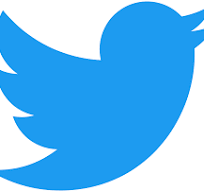



[Facebook | The Construct ](https://www.facebook.com/theconstructsim) 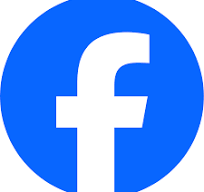